# Ensemble

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator

### Ploting utilities

In [6]:
def plot_decision_boundary(X, model):
    h = .02 

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

### Build forest model

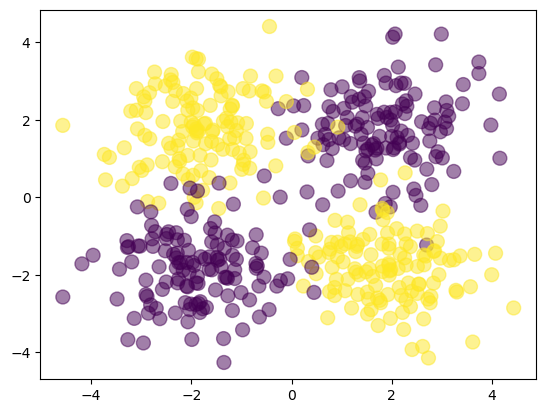

In [7]:
np.random.seed(10)

N = 500
D = 2
X = np.random.randn(N, D)

delta = 1.75
X[:125] += np.array([delta, delta])
X[125:250] += np.array([delta, -delta])
X[250:375] += np.array([-delta, delta])
X[375:] += np.array([-delta, -delta])
Y = np.array([0] * 125 + [1]*125 + [1]*125 + [0] * 125)

plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

In [2]:
# init
# fit
    # multiple model    
    # select feature
    # sampling data
    # fit each model    
# predict
    # predit with each model    
    # aggregate results and decide final prediction
# score()

class Forest(BaseEstimator):
    def __init__(self, M): 
        self.M = M  
        self.models = []

    def fit(self, X, Y):
        N = len(X)
        
        for i in range(self.M):
            indexes = np.random.choice(N, size=N, replace=True)  
            X_train = X[indexes]
            Y_train = Y[indexes]  
            model = DecisionTreeClassifier(max_depth=4)
            model.fit(X_train, Y_train)
            self.models.append(model)

    def predict(self, X):
        predictions = np.zeros(len(X))
        for i, model in enumerate(self.models):
            predictions += model.predict(X)
        return np.round(predictions/self.M)
    
    def score(self, X, Y):
        y_pred = self.predict(X)
        return accuracy_score(Y, y_pred)        

baggedTree = Forest(100)
baggedTree.fit(X, Y)
print("score for bagged tree model:", baggedTree.score(X, Y))

plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, baggedTree)
plt.show()

NameError: name 'BaseEstimator' is not defined

### Evaluate model

### Predit on test dataset


### Output

In [ ]:

# df = pd.DataFrame()
# df.to_csv('submission.csv',index = False, header=True)